In [1]:
# Authors: Santiago Isaza and Pablo Osorio

# Based on Sergio Andres Lenis's artificial intelligence course work at Universidad EAFIT

In [26]:
!pip install scikit-fuzzy
!pip install matplotlib
!pip install numpy
!pip install pandas

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import re
import skfuzzy as fuzz

# Matplotlib
%matplotlib inline

# NumPy
np.set_printoptions(suppress=True)

## Parameters for grading

`due_date` $\in \mathbb{Z} \cap [0, 10]$

`code_quality` $\in \mathbb{Z} \cap [0, 5]$

`work_quality` $\in \mathbb{Z} \cap [0, 5]$

In [4]:
due_date = 8 # due date of the work
code_quality = 4.5 # code quality of the work
work_quality = 4.5 # quality of the work

In [5]:
# inputs
x_date = np.linspace(0,10,100)
x_code = np.linspace(0,5,100)
x_work = np.linspace(0,5,100)

# Output
x_grade = np.linspace(start=0, stop=5, num=100)

In [6]:
three_sd = 3 # standard deviation
def gauss(mean,zero_value):
    ''' 
    Args:
    mean: mean of the gaussian
    zero_value: value of the gaussian at zero

    Returns:
    standard deviation of the gaussian
    '''
    sigma = np.abs(zero_value-mean)/three_sd
    return mean,sigma

def sigmoid_params(x,a,b):
    '''
    Args:
    x: x value
    a: slope
    b: midpoint

    Returns:
    y value
    '''

    c = -np.log((1 - a) / a) / (x - b)
    return b, c

## Due date
Parameter related to the delay with which the work is delivered. 10 if it is delivered well before the final date and 0 if it is delivered much later.

In [7]:
# low due date
low_date = fuzz.trapmf(x_date, [0,0,3,6])
# medium due date
mean,sigma = gauss(5,7)
medium_date = fuzz.gaussmf(x_date,mean,sigma)
# high due date
high_date = fuzz.trapmf(x_date, [4,7,10,10])

## Code quality

Quality with which the code is delivered. 5 is a well-delivered code, with comments and docstring. While 0 is no code delivered

In [8]:
# poor code quality
b,c = sigmoid_params(3,0.005,2)
low_code = fuzz.sigmf(x_code,b,c)
# medium code quality
mean,sigma = gauss(3,4.5)
medium_code = fuzz.gaussmf(x_code,mean,sigma)
# high code quality
high_code = fuzz.trapmf(x_code, [4,4.5,5,5])

## Work quality

Quality of the written report. Good spelling, quality of references and images mean a high mark (5), bad practices mean a bad mark.

In [9]:
# poor work quality
b,c = sigmoid_params(3,0.005,2)
low_work = fuzz.sigmf(x_work,b,c)
# medium work quality
mean,sigma = gauss(3,4.5)
medium_work = fuzz.gaussmf(x_work,mean,sigma)
# high work quality
high_work = fuzz.trapmf(x_work, [4,4.5,5,5])

# Grade

Grade levels. A mediocre grade is equal to a lousy grade, an excellent grade is equal to or higher than 4.5.

In [10]:
# mediocre grade
grade_wo = fuzz.trapmf(x=x_grade, abcd=[0, 0, 1, 2])

# bad grade
mean, sigma = gauss(mean=2, zero_value=3)
grade_bd = fuzz.gaussmf(x=x_grade, mean=mean, sigma=sigma)

# medium grade
mean, sigma = gauss(mean=3, zero_value=4)
grade_md = fuzz.gaussmf(x=x_grade, mean=mean, sigma=sigma)

# good grade
mean, sigma = gauss(mean=4, zero_value=5)
grade_gd = fuzz.gaussmf(x=x_grade, mean=mean, sigma=sigma)

# excellent grade
mean, sigma = gauss(mean=5, zero_value=4)
grade_ex = fuzz.gaussmf(x=x_grade, mean=mean, sigma=sigma)

In [11]:
def adjust_plot(plt, axes):
    '''
    Args:
    plt: matplotlib.pyplot
    axes: axes of the plot
    
    Returns:
    None
    '''
    # Turn off top and right axes
    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

    # Adjust spacing between subplots
    plt.tight_layout()

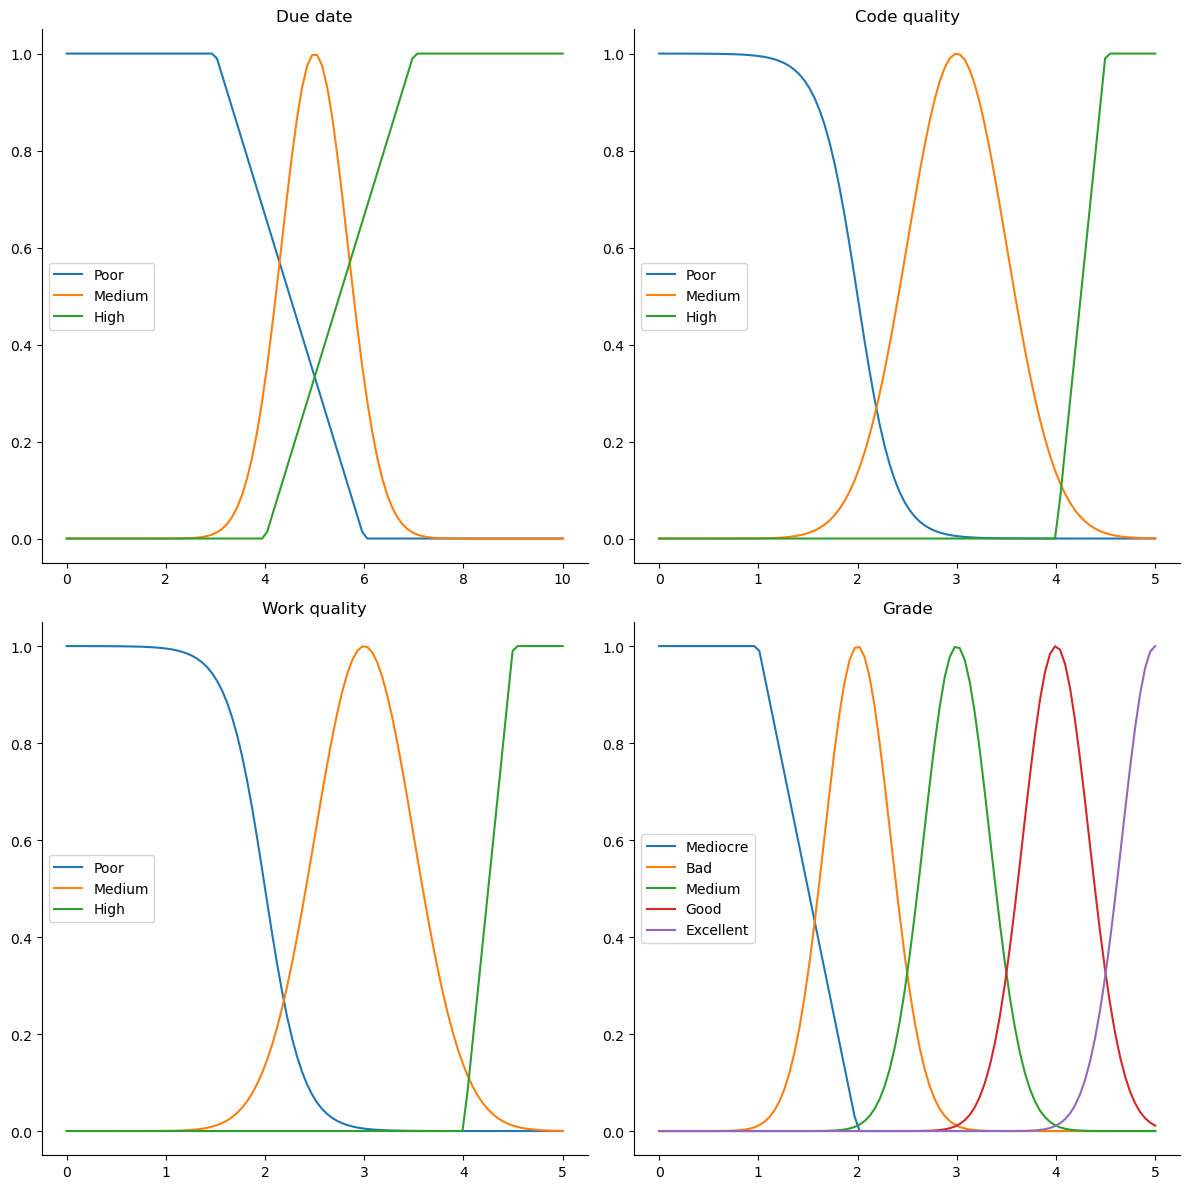

In [12]:
# Create a figure and a set of subplots
fig_size = 12
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(fig_size, fig_size))
axes = axes.flatten()



# due date plot with the categories
axes[0].plot(x_date, low_date, 'C0')
axes[0].plot(x_date, medium_date, 'C1')
axes[0].plot(x_date, high_date, 'C2')
axes[0].set_title('Due date')
axes[0].legend(['Poor', 'Medium', 'High'], loc='center left')


# code quality with categories
axes[1].plot(x_code, low_code, 'C0')
axes[1].plot(x_code, medium_code, 'C1')
axes[1].plot(x_code, high_code, 'C2')
axes[1].set_title('Code quality')
axes[1].legend(['Poor', 'Medium', 'High'], loc='center left')

# work quality with categories
axes[2].plot(x_work, low_work, 'C0')
axes[2].plot(x_work, medium_work, 'C1')
axes[2].plot(x_work, high_work, 'C2')
axes[2].set_title('Work quality')
axes[2].legend(['Poor', 'Medium', 'High'], loc='center left')

# grade quality with categories
axes[3].plot(x_grade, grade_wo, 'C0')
axes[3].plot(x_grade, grade_bd, 'C1')
axes[3].plot(x_grade, grade_md, 'C2')
axes[3].plot(x_grade, grade_gd, 'C3')
axes[3].plot(x_grade, grade_ex, 'C4')
axes[3].set_title('Grade')
axes[3].legend(['Mediocre', 'Bad', 'Medium', 'Good', 'Excellent'], loc='center left')


# beautify the plot
adjust_plot(plt, axes)
# set style
plt.style.use('ggplot')

## Activation of the fuzzy membership functions

In [13]:
# domain
domain = [x_date, x_code, x_work]

membership_functions = np.array([
    [low_date, medium_date, high_date],
    [low_code, medium_code, high_code],
    [low_work, medium_work, high_work]
])

inputs = np.array([due_date, code_quality, work_quality]) 

In [14]:
# activation
n = len(domain)
activation = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        activation[i,j] = fuzz.interp_membership(domain[i], membership_functions[i,j], inputs[i])
    
print(activation)

[[0.         0.00004133 1.        ]
 [0.0000018  0.01114742 0.99090909]
 [0.0000018  0.01114742 0.99090909]]


## Decision rules

One line per rule. Each line has the following structure:

    [Category Level] and/or [Category Level] and/or [Category Level] then [Grade Level]

An example:

    [due_date Medium] and/or [code_quality High] and/or [work_quality High] then [Grade Excellent]



In [15]:
# Decision rules
decision_rules = '''
[Due_date poor] and [Code_quality poor] and [Work_quality poor] then [Grade mediocre]
[Due_date poor] and [Code_quality poor] and [Work_quality medium] then [Grade mediocre]
[Due_date poor] and [Code_quality poor] and [Work_quality high] then [Grade mediocre]
[Due_date poor] and [Code_quality medium] and [Work_quality poor] then [Grade mediocre]
[Due_date poor] and [Code_quality medium] and [Work_quality medium] then [Grade medium]
[Due_date poor] and [Code_quality medium] and [Work_quality high] then [Grade good]
[Due_date poor] and [Code_quality high] and [Work_quality poor] then [Grade bad]
[Due_date poor] and [Code_quality high] and [Work_quality medium] then [Grade medium]
[Due_date poor] and [Code_quality high] and [Work_quality high] then [Grade excellent]
[Due_date medium] and [Code_quality poor] and [Work_quality poor] then [Grade mediocre]
[Due_date medium] and [Code_quality poor] and [Work_quality medium] then [Grade medium]
[Due_date medium] and [Code_quality poor] and [Work_quality high] then [Grade good]
[Due_date medium] and [Code_quality medium] and [Work_quality poor] then [Grade medium]
[Due_date medium] and [Code_quality medium] and [Work_quality medium] then [Grade medium]
[Due_date medium] and [Code_quality medium] and [Work_quality high] then [Grade good]
[Due_date medium] and [Code_quality high] and [Work_quality poor] then [Grade good]
[Due_date medium] and [Code_quality high] and [Work_quality medium] then [Grade good]
[Due_date medium] and [Code_quality high] and [Work_quality high] then [Grade excellent]
[Due_date high] and [Code_quality poor] and [Work_quality poor] then [Grade bad]
[Due_date high] and [Code_quality poor] and [Work_quality medium] then [Grade medium]
[Due_date high] and [Code_quality poor] and [Work_quality high] then [Grade excellent]
[Due_date high] and [Code_quality medium] and [Work_quality poor] then [Grade good]
[Due_date high] and [Code_quality medium] and [Work_quality medium] then [Grade good]
[Due_date high] and [Code_quality medium] and [Work_quality high] then [Grade excellent]
[Due_date high] and [Code_quality high] and [Work_quality poor] then [Grade excellent]
[Due_date high] and [Code_quality high] and [Work_quality medium] then [Grade excellent]
[Due_date high] and [Code_quality high] and [Work_quality high] then [Grade excellent]
'''

# parse decision rules
decision_rules = decision_rules.splitlines()
decision_rules = [s for s in decision_rules if len(s) > 0]
decision_rules = [re.findall(r'[\w]+', s) for s in decision_rules]
# lower case for decision rules
decision_rules = [[s.lower() for s in rule] for rule in decision_rules]


In [16]:
# dictionary of rules
categories = {'due_date': 0, 'code_quality': 1, 'work_quality': 2}
levels = {'poor': 0, 'medium': 1, 'high': 2}

# grades
grades = {'mediocre': 0, 'bad': 1, 'medium': 2, 'good': 3, 'excellent': 4}

# operator
operators = ['and', 'or']


In [17]:
# Operator precedence: Not, And, Or
def process_rule(rule, activation):
    n_activations = 3
    # Activations
    activations = np.zeros((n_activations,))
    for i in range(n_activations):
        category, level, _ = rule[(i * 3):((i + 1) * 3)]
        activations[i] = activation[categories[category], levels[level]]
    # Operators
    op_1, op_2 = rule[2], rule[5]
    assert op_1 in operators and op_2 in operators
    # Active rule
    if op_1 == op_2:
        if op_1 == 'and':
            active_rule = activations.min()
        else:  # 'or'
            active_rule = activations.max()
    else:
        a, b, c = activations
        if op_1 == 'and':  # (a and b) or c
            active_rule = np.maximum(np.minimum(a, b), c)
        else:  # a or (b and c)
            active_rule = np.maximum(a, np.minimum(b, c))        
    # active_rule
    return active_rule

In [18]:
active_rules = [process_rule(rule, activation) for rule in decision_rules]
active_rules = np.array(active_rules)

In [19]:
# Grade activations
grade_activations = []

# Grades
grade_sets = [grade_wo, grade_bd, grade_md, grade_gd, grade_ex]

for i, rule in enumerate(decision_rules):
    # Get consequent
    consequent = grade_sets[grades[rule[-1]]]
    # Grade activation
    grade_activations += [np.fmin(active_rules[i], consequent)]

In [20]:
# How many decisions rules are activated?
threshold = 0.5

n_activated = np.sum([1 for elem in [elem.max() for elem in grade_activations] if elem > threshold])

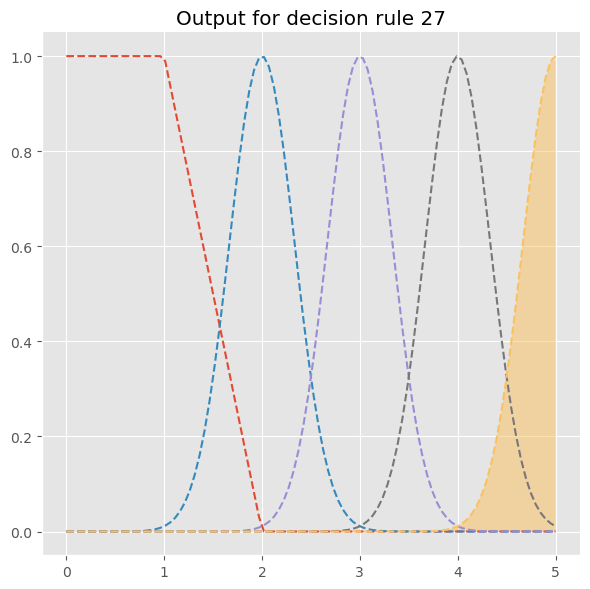

In [21]:
# Initialize
grade_bottom = np.zeros_like(x_grade)

if n_activated > 0:
    # Create a figure and a set of subplots
    fig_size = 6
    fig, axes = plt.subplots(nrows=n_activated, figsize=(fig_size, fig_size * n_activated))
    if n_activated == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    row = 0

    for i, grade_activation in enumerate(grade_activations):
        if grade_activation.max() > threshold:
            # Color
            c = 'C{}'.format(grades[decision_rules[i][-1]])
            # Fill region
            axes[row].fill_between(x_grade, grade_bottom, grade_activation, facecolor=c, alpha=0.5)
            # Fuzzy sets
            for j, a_set in enumerate([grade_wo, grade_bd, grade_md, grade_gd, grade_ex]):
                axes[row].plot(x_grade, a_set, color='C{}'.format(j), linestyle='--')
            # Title
            title = 'Output for decision rule {}'.format(str(i + 1).zfill(2))
            axes[row].set_title(title)
            # Update row
            row += 1

adjust_plot(plt, axes)

In [22]:
# Aggregate all output membership functions
aggregated = np.zeros(grade_activations[0].shape)

# Get color for the rule with the largest activation
max_index = None
max_value = 0

for i, grade_activation in enumerate(grade_activations):
    grade_max = grade_activation.max()
    # Update maximum value
    if max_value < grade_max:
        max_index = i
        max_value = grade_max
    aggregated = np.fmax(aggregated, grade_activation)

In [23]:
# Defuzzify result
final_grade = fuzz.defuzz(x_grade, aggregated, 'lom')
final_grade_activation = fuzz.interp_membership(x_grade, aggregated, final_grade)

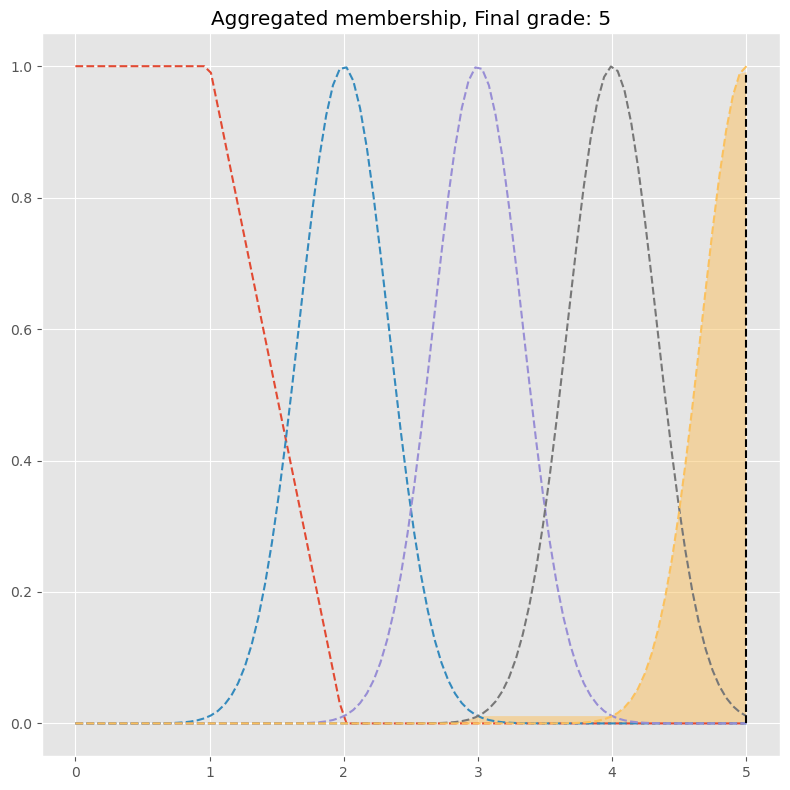

In [24]:
# Create a figure and a subplot
fig_size = 8
fig, ax = plt.subplots(figsize=(fig_size, fig_size))


# Fuzzy sets
for i, a_set in enumerate([grade_wo, grade_bd, grade_md, grade_gd, grade_ex]):
    ax.plot(x_grade, a_set, color='C{}'.format(i), linestyle='--')

# Aggregated membership
c = 'C{}'.format(grades[decision_rules[max_index][-1]])
ax.fill_between(x_grade, grade_bottom, aggregated, facecolor=c, alpha=0.5)

# Final grade
ax.plot([final_grade, final_grade], [0, final_grade_activation], 'k--')

# Title
rounded_grade = int(np.round(final_grade))
title = 'Aggregated membership, Final grade: {}'.format(rounded_grade)
ax.set_title(title)

adjust_plot(plt, axes)

In [25]:
if rounded_grade < 3:
    msg = 'Better luck next time!'
elif rounded_grade < 4:
    msg = 'You did good! Keep it up!'
elif rounded_grade < 4.5:
    msg = 'You did great! Keep it up!'
else:
    msg = 'Congratulations!'

print('{} Your final grade is {}.'.format(msg, rounded_grade))

Congratulations! Your final grade is 5.
